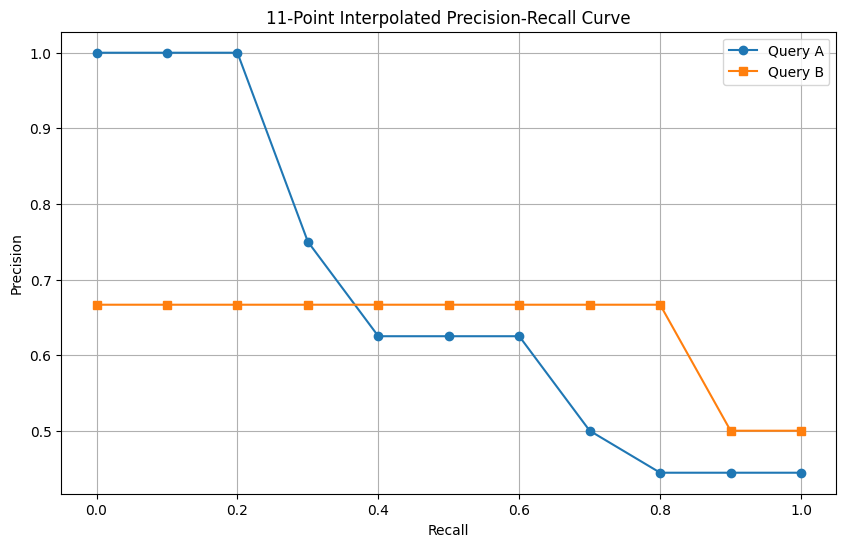

([1.0,
  1.0,
  1.0,
  0.75,
  0.625,
  0.625,
  0.625,
  0.5,
  0.4444444444444444,
  0.4444444444444444,
  0.4444444444444444],
 [0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.5,
  0.5])

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data untuk Query A dan Query B
# - relevan positions adalah posisi di mana dokumen relevan ditemukan
# - total_relevan adalah total dokumen relevan dalam koleksi
# - retrieved adalah jumlah total dokumen yang diambil

# Query A
relevan_positions_A = [1, 2, 4, 7, 8, 12, 16, 18]
total_relevan_A = 8
retrieved_A = 20

# Query B
relevan_positions_B = [2, 3, 5, 6, 10]
total_relevan_B = 5
retrieved_B = 10

# Fungsi untuk menghitung precision dan recall di posisi relevan
def calculate_precision_recall(relevan_positions, total_relevan, retrieved):
    precision = []
    recall = []
    retrieved_relevan = 0  # counter untuk dokumen relevan yang ditemukan

    for i in range(1, retrieved + 1):
        if i in relevan_positions:
            retrieved_relevan += 1
            precision.append(retrieved_relevan / i)
            recall.append(retrieved_relevan / total_relevan)

    return precision, recall

# Precision dan recall untuk masing-masing query
precision_A, recall_A = calculate_precision_recall(relevan_positions_A, total_relevan_A, retrieved_A)
precision_B, recall_B = calculate_precision_recall(relevan_positions_B, total_relevan_B, retrieved_B)

# Fungsi untuk interpolasi precision pada 11-point recall levels
def interpolate_11pt_precision(recall, precision):
    recall_levels = np.linspace(0, 1, 11)
    interpolated_precision = []
    
    for level in recall_levels:
        # Maksimum precision untuk recall >= level
        possible_precisions = [p for r, p in zip(recall, precision) if r >= level]
        interpolated_precision.append(max(possible_precisions) if possible_precisions else 0)
    
    return recall_levels, interpolated_precision

# Interpolasi untuk Query A dan B
recall_levels_A, interpolated_precision_A = interpolate_11pt_precision(recall_A, precision_A)
recall_levels_B, interpolated_precision_B = interpolate_11pt_precision(recall_B, precision_B)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(recall_levels_A, interpolated_precision_A, label="Query A", marker='o')
plt.plot(recall_levels_B, interpolated_precision_B, label="Query B", marker='s')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("11-Point Interpolated Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

# Outputting interpolated precision values for each recall level
(interpolated_precision_A, interpolated_precision_B)

In [2]:
import numpy as np
import pandas as pd

# Data untuk Query A dan Query B
# - relevan positions adalah posisi di mana dokumen relevan ditemukan
# - total_relevan adalah total dokumen relevan dalam koleksi
# - retrieved adalah jumlah total dokumen yang diambil

# Query A
relevan_positions_A = [1, 2, 4, 7, 8, 12, 16, 18]
total_relevan_A = 8
retrieved_A = 20

# Query B
relevan_positions_B = [2, 3, 5, 6, 10]
total_relevan_B = 5
retrieved_B = 10

# Fungsi untuk menghitung precision dan recall di posisi relevan
def calculate_precision_recall(relevan_positions, total_relevan, retrieved):
    precision = []
    recall = []
    retrieved_relevan = 0  # counter untuk dokumen relevan yang ditemukan

    for i in range(1, retrieved + 1):
        if i in relevan_positions:
            retrieved_relevan += 1
            precision.append(retrieved_relevan / i)
            recall.append(retrieved_relevan / total_relevan)

    return precision, recall

# Precision dan recall untuk masing-masing query
precision_A, recall_A = calculate_precision_recall(relevan_positions_A, total_relevan_A, retrieved_A)
precision_B, recall_B = calculate_precision_recall(relevan_positions_B, total_relevan_B, retrieved_B)

# Fungsi untuk menghitung interpolasi precision pada 11 titik recall
def calculate_11pt_precision_interpolation(recall, precision):
    recall_levels = np.linspace(0, 1, 11)
    interpolated_precision = []
    
    for level in recall_levels:
        # Maksimum precision untuk recall >= level
        possible_precisions = [p for r, p in zip(recall, precision) if r >= level]
        interpolated_precision.append(max(possible_precisions) if possible_precisions else 0)
    
    return recall_levels, interpolated_precision

# Menghitung interpolated precision untuk 11-point recall
recall_levels_A, interpolated_precision_A = calculate_11pt_precision_interpolation(recall_A, precision_A)
recall_levels_B, interpolated_precision_B = calculate_11pt_precision_interpolation(recall_B, precision_B)

# Membuat DataFrame untuk hasil 11-pt precision
pr_11pt_A = pd.DataFrame({'Recall Level': recall_levels_A, 'Interpolated Precision (Query A)': interpolated_precision_A})
pr_11pt_B = pd.DataFrame({'Recall Level': recall_levels_B, 'Interpolated Precision (Query B)': interpolated_precision_B})

pr_11pt_A, pr_11pt_B

(    Recall Level  Interpolated Precision (Query A)
 0            0.0                          1.000000
 1            0.1                          1.000000
 2            0.2                          1.000000
 3            0.3                          0.750000
 4            0.4                          0.625000
 5            0.5                          0.625000
 6            0.6                          0.625000
 7            0.7                          0.500000
 8            0.8                          0.444444
 9            0.9                          0.444444
 10           1.0                          0.444444,
     Recall Level  Interpolated Precision (Query B)
 0            0.0                          0.666667
 1            0.1                          0.666667
 2            0.2                          0.666667
 3            0.3                          0.666667
 4            0.4                          0.666667
 5            0.5                          0.666667
 6         